# USGS Earthquake Data Parsing and Analysis Toolkit

This Jupyter Notebook provides a suite of Python classes designed to parse, analyze, and visualize earthquake data from various formats. It is tailored for handling data produced by the USGS ShakeMap system, supporting JSON, XML, and ZIP files related to seismic instruments and earthquake events. The toolkit streamlines the process of working with complex seismic data formats, making it accessible for researchers, analysts, and enthusiasts.

## Contents:
1. **Import Statements**: Load the necessary Python libraries and modules for data handling, visualization, and geographical operations.
2. **Utility Function**:
   - `haversine_distance`: Calculates the distance between two geographical points using the Haversine formula.
   - `AccelerationUnitConverter`: Converts between different units of acceleration related to gravity.

3. **Class Definitions**:
    - `ParseInstrumentsData`: Parses seismic station data from JSON files. It supports two file structures: one for original instrumented data and another for alternate station lists. Measurements such as peak ground acceleration (PGA), peak ground velocity (PGV), and various spectral accelerations (SA) are extracted along with intensity values. It also offers functions to output the data as a Pandas DataFrame or dictionary and provides methods to generate statistical plots.
    - `ParseDYFIDataXML`: Handles DYFI (Did You Feel It?) XML files in two modes:
        - **Parse mode:** Reads an existing DYFI XML file and extracts station data, producing summaries and DataFrame outputs.
        - **Create mode:** Accepts station data from a CSV file, computes UTM coordinate codes, and creates a new DYFI XML file.
    - `ParseDYFIData`: Automatically detects and parses various types of DYFI data files—including plain text and XML formats for CDI GEO, CDI ZIP, and specialized plot files (e.g., number of responses and attenuation curves). It includes dedicated plotting routines for visualizing response counts and attenuation data.
    - `ParseEventDataXML`: Manages earthquake event XML files. In parse mode it reads an existing event XML to extract detailed event attributes (such as event ID, location, magnitude, depth, and time), while in create mode it accepts a dictionary of event attributes and generates a new XML file when explicitly requested.
    - `ParseRuptureDataJson`: Parses JSON files containing earthquake rupture dimensions. It extracts rupture metadata and coordinate information from multi-polygon geometries, and provides methods to display the rupture extent on a map. Additionally, it can output the data as a flattened DataFrame or dictionary for further analysis.
    - `ParsePagerDataXML`: Extracts earthquake impact data from PAGER XML files. This class parses event details, alert-level information (including probability distributions), city-specific impact data, and supplementary comments. It converts the parsed information into DataFrames and dictionaries and includes a specialized plotting function to visualize alert probability distributions.
    - `ParseModelConfig`: Manages configuration files used for seismic event simulations and GMPE (Ground Motion Prediction Equation) modeling. It supports both parsing existing configuration files and creating new ones using provided configuration data (which includes details such as GMPE sets, weights, and cutoff distances). It also includes functions to display and return used GMPEs for further analysis.
    - `ShakemapParserFLT`: Parses and visualizes USGS shakemap raster data from FLT (raster) and HDR (header) files, or directly from ZIP archives containing these files. It reconstructs the geographical grid, computes basic statistics, and provides both DataFrame and dictionary representations. Overlay methods allow for adding stations, rupture lines, epicenters, and DYFI data onto the shakemap.
    - `ShakemapXMLViewer`: Provides an interactive viewer for shakemap XML data. It extracts event metadata and grid data from the XML file, constructs a DataFrame with interleaved unit columns, and visualizes the data on a Cartopy map. This viewer supports overlaying additional geospatial layers such as seismic stations, rupture outlines, earthquake epicenters, and city locations.
    - `ShakemapXMLParser`: Specifically parses USGS shakemap XML files to extract detailed event metadata, grid field definitions (including units), and numerical shakemap data. It supports selecting columns based on the intensity measure type (IMT) and value type (mean or standard deviation) and returns structured outputs in the form of DataFrames, dictionaries, and raw grids.
    - `ParseEventInfo`: Loads, parses, and analyzes comprehensive earthquake event information from JSON files. The data includes multiple sections such as GMPE selections, event details, STREC (seismic record), output measures, processing details, and site response characteristics. This class provides both a dictionary representation of the full dataset and a flattened DataFrame for easy manipulation, along with dedicated methods for summarizing each section.
    - `USGSParser`: Serves as a unified facade for the entire toolkit. By providing a parser type (e.g., `instrumented_data`, `dyfi_data_xml`, `pager_xml`, `shakemap_raster`, etc.) and the necessary keyword arguments, the USGSParser automatically instantiates and delegates all method calls to the appropriate underlying parser. This unified interface streamlines user interaction with multiple USGS data formats without needing to manage each specialized parser separately.


## Implementation Details:
- **Libraries Used**:
  - `pandas` for data manipulation and analysis.
  - `numpy` for numerical operations.
  - `matplotlib` and `seaborn` for data visualization.
  - `xml.etree.ElementTree` for XML parsing.
  - `pyproj` for geographic projections and transformations.
  - `cartopy` for geographical plotting and mapping.
- **Error Handling**:
  - Robust error handling ensures the notebook remains functional across various potential data inconsistencies or file access issues.

By integrating various data parsing functionalities into this notebook, it provides a comprehensive toolkit for earthquake data analysis published by USGS. This toolkit facilitates the handling of complex seismic data formats, making it easier to conduct detailed and insightful analysis.


---
`last update: March, 2025`
`Version: 26.1`









In [1]:
from modules.SHAKEparser import *

# Example Operations  

## Parsing Event Source 

### Parse [event.xml]

In [2]:
# load files 
file_path_eventxml='./example_data/SHAKEfetch/us7000pn9s/current/event.xml'

parser = USGSParser(parser_type='event_xml', mode='parse', event_xml=file_path_eventxml)
event_df = parser.get_dataframe()
print("Earthquake Event Data DataFrame:")
parser.get_summary()




Event XML parsed successfully.
Earthquake Event Data DataFrame:
Earthquake Event Summary:
ID: us7000pn9s
Network ID: us
Network: USGS National Earthquake Information Center, PDE
Latitude: 21.9963
Longitude: 95.9258
Depth (km): 10.0
Magnitude: 7.7
Time: 2025-03-28T07:20:52Z
Location String: 2025 Mandalay, Burma (Myanmar) Earthquake
Event Type: ACTUAL
Reviewed: unknown


### Event Information 

In [3]:
# load files 
file_path ='./example_data/SHAKEfetch/usgs-event_info-versions/us7000pn9s/us7000pn9s_us_020_info.json'

parser = USGSParser(parser_type='event_info', file_path=file_path)

print("Earthquake Event Data DataFrame:")
#parser.get_summary()
parser.get_event_info()

Earthquake Event Data DataFrame:


{'depth': '10.0',
 'event_id': 'us7000pn9s',
 'eventsource': 'us',
 'netid': 'us',
 'eventsourcecode': '7000pn9s',
 'id': 'us7000pn9s',
 'productcode': 'us7000pn9s',
 'productsource': 'us',
 'producttype': 'shakemap',
 'event_ref': ' Fault from Reitman, N.G., Yu Wang, Yu-Ting Kuo, C. Hanagan, A. Hatem, C. DuRoss, W Barnhart, H. Yin, R. Briggs, J. Thompson Jobe, S. Nicovich, E. Lynch, J. Powell, and R. Schmitt. Remote Surface Rupture Observations for the M7.7 2025 Mandalay, Burma (Myanmar) Earthquake (DOI: https://doi.org/10.5066/P1RYMWCK',
 'fault_ref': ' Fault from Reitman, N.G., Yu Wang, Yu-Ting Kuo, C. Hanagan, A. Hatem, C. DuRoss, W Barnhart, H. Yin, R. Briggs, J. Thompson Jobe, S. Nicovich, E. Lynch, J. Powell, and R. Schmitt. Remote Surface Rupture Observations for the M7.7 2025 Mandalay, Burma (Myanmar) Earthquake (DOI: https://doi.org/10.5066/P1RYMWCK',
 'intensity_observations': '145',
 'latitude': '21.9963',
 'longitude': '95.9258',
 'location': '2025 Mandalay, Burma (Myanmar

### Create [event.xml]

In [4]:
# Creating a new XML based on user input

attributes = {
    'id': 'us7000m9g4',
    'netid': 'USGS',
    'network': 'USGS National Earthquake Information Center, PDE',
    'lat': '23.8190',
    'lon': '121.5616',
    'depth': '34.8',
    'mag': '7.4',
    'time': '2024-04-03T01:58:11Z',
    'locstring': '18 km SSW of Hualien City, Taiwan',
    'event_type': 'Scenario',
    'reviewed': 'unknown'
}


creator = USGSParser(parser_type='event_xml',mode='create', event_attributes=attributes)
#creator = USGSParser(data_type='event_xml', mode='create',event_id='us7000m9g4', event_attributesattributes)
#creator = USGSParser(data_type='event_xml',mode='create', event_id='us7000m9g4', file_path='./event_data', event_attributes=attributes)
#creator = USGSParser(data_type='event_xml',mode='create',file_path='./event_data', event_attributes=attributes)
creator.write_event_xml()

Attributes initialized successfully, XML file not yet created.
XML file created successfully at: ./export/usgs-scenarios\us7000m9g4\current\event.xml


## Model Selection 

In [5]:
#file_path = './example_event/us7000m9g4/current/model_select.conf'

file_path_model_config = './example_data/SHAKEfetch/us7000pn9s/current/model_select.conf'

# For parsing model configuration data:
parser = USGSParser(parser_type='model_config', mode='parse', config_file=file_path_model_config)
#config_dict = parser.get_model_config()
#config_dict


# print used GMPE's
parser.print_used_gmpes()


'active_crustal_nshmp2014'  [0.6515268512384039]
  ASK14 [0.25]: AbrahamsonEtAl2014 from openquake.hazardlib.gsim.abrahamson_2014
  BSSA14 [0.25]: BooreEtAl2014 from openquake.hazardlib.gsim.boore_2014
  CB14 [0.25]: CampbellBozorgnia2014 from openquake.hazardlib.gsim.campbell_bozorgnia_2014
  CY14 [0.25]: ChiouYoungs2014 from openquake.hazardlib.gsim.chiou_youngs_2014
'subduction_crustal'  [0.34847314876159613]
  ASK14 [0.25]: AbrahamsonEtAl2014 from openquake.hazardlib.gsim.abrahamson_2014
  BSSA14 [0.25]: BooreEtAl2014 from openquake.hazardlib.gsim.boore_2014
  CB14 [0.25]: CampbellBozorgnia2014 from openquake.hazardlib.gsim.campbell_bozorgnia_2014
  CY14 [0.25]: ChiouYoungs2014 from openquake.hazardlib.gsim.chiou_youngs_2014



In [6]:
# create a dictionary from used GMPE's 
used_gmpe = parser.get_used_gmpes()
used_gmpe

{'active_crustal_nshmp2014': {'set_weight': 0.6515268512384039,
  'gmpes': [{'gmpe_name': 'ASK14',
    'gmpe_weight': 0.25,
    'class_name': 'AbrahamsonEtAl2014',
    'module_name': 'openquake.hazardlib.gsim.abrahamson_2014'},
   {'gmpe_name': 'BSSA14',
    'gmpe_weight': 0.25,
    'class_name': 'BooreEtAl2014',
    'module_name': 'openquake.hazardlib.gsim.boore_2014'},
   {'gmpe_name': 'CB14',
    'gmpe_weight': 0.25,
    'class_name': 'CampbellBozorgnia2014',
    'module_name': 'openquake.hazardlib.gsim.campbell_bozorgnia_2014'},
   {'gmpe_name': 'CY14',
    'gmpe_weight': 0.25,
    'class_name': 'ChiouYoungs2014',
    'module_name': 'openquake.hazardlib.gsim.chiou_youngs_2014'}]},
 'subduction_crustal': {'set_weight': 0.34847314876159613,
  'gmpes': [{'gmpe_name': 'ASK14',
    'gmpe_weight': 0.25,
    'class_name': 'AbrahamsonEtAl2014',
    'module_name': 'openquake.hazardlib.gsim.abrahamson_2014'},
   {'gmpe_name': 'BSSA14',
    'gmpe_weight': 0.25,
    'class_name': 'BooreEtAl201

In [7]:
# Example of creating a configuration file
config_data = {'event_id': 'us7000m9g4',
                                'gmpe_sets': {
                                    'gmpe_us7000m9g4_custom': {
                                        'gmpes': ['active_crustal_taiwan_deep', 'subduction_interface_nshmp2014'],
                                        'weights': [0.6691643912838412, 0.33083560871615886],
                                        'weights_large_dist': None,
                                        'dist_cutoff': float('nan'),
                                        'site_gmpes': None,
                                        'weights_site_gmpes': None
                                    }
                                },
                                'modeling': {
                                    'gmpe': 'gmpe_us7000m9g4_custom',
                                    'mechanism': 'RS',
                                    'ipe': 'VirtualIPE',
                                    'gmice': 'WGRW12',
                                    'ccf': 'LB13'
                                }
                            }

# Create the configuration file
parser = USGSParser(parser_type='model_config', mode='create', config_data=config_data)


Config file created at ./export/usgs-scenarios/us7000m9g4/current\model_select.conf


## Instruments Data
### parse instruments data [instruments_data.json]

In [8]:
file_path_instrument_data = "./example_data/SHAKEfetch/usgs-instruments_data-versions/us7000pn9s/us7000pn9s_us_020_stationlist.json"


# Parse Instruments Data 
instrument_parser = USGSParser(parser_type = 'instrumented_data',json_file=file_path_instrument_data)
instruments_data = instrument_parser.get_dataframe(value_type='pga')


instruments_data

,id,station_code,instrumentType,commType,station_name,longitude,latitude,location,source,network,...,pga_selected,pgv_selected,predictions,mmi_from_pgm,channel_number,HNE,HNN,HNZ,pga,pga_unit
0,IU.CHTO,CHTO,UNK,UNK,"Chiang Mai, Thailand",98.9443,18.8141,,IU,IU,...,1.1335,2.6843,"[{'name': 'sa(0.3)', 'value': 2.0544, 'value_r...","[{'name': 'sa(0.3)', 'value': 3.8, 'sigma': 0....",3,1.3755,1.1335,0.9203,1.3755,%g
1,MM.KTN,KTN,UNK,UNK,"Keng Tun, Shan, Myanmar",99.5898,21.2857,,MM,MM,...,1.3778,3.8197,"[{'name': 'sa(0.3)', 'value': 1.3435, 'value_r...","[{'name': 'sa(0.3)', 'value': 4.24, 'sigma': 0...",3,0.8502,1.3778,1.2626,1.3778,%g
2,GE.NPW,NPW,UNK,UNK,"DMH/GEOFON Station Naypyitaw, Myanmar",96.1380,19.7790,,None,GE,...,62.308,161.42,"[{'name': 'sa(0.3)', 'value': 142.0982, 'value...","[{'name': 'sa(0.3)', 'value': None, 'sigma': N...",3,57.4370,62.3080,107.3400,107.3400,%g
3,MM.NGU,NGU,UNK,UNK,"Ngaung U, Myanmar",94.9170,21.2060,,None,MM,...,5.6537,8.9515,"[{'name': 'sa(0.3)', 'value': 15.7011, 'value_...","[{'name': 'sa(0.3)', 'value': None, 'sigma': N...",3,4.2729,5.6537,1.7771,5.6537,%g
4,MM.YGN,YGN,UNK,UNK,"Yangon, Yangon, Myanmar",96.1530,16.8650,,None,MM,...,2.434,10.471,"[{'name': 'sa(0.3)', 'value': 11.6684, 'value_...","[{'name': 'sa(0.3)', 'value': None, 'sigma': N...",3,2.4340,1.8610,1.9697,2.4340,%g
5,TM.PANO,PANO,UNK,UNK,"Huai Kan, Nakhon Phanom",104.6100,17.1480,,None,TM,...,null,null,"[{'name': 'sa(0.3)', 'value': 0.0202, 'value_r...","[{'name': 'sa(0.3)', 'value': None, 'sigma': N...",3,0.1906,0.2390,0.1711,0.2390,%g


### Chek if data was parsed correctly

In [9]:
# Show maximum values 
# Step 1: Find the index of the maximum value in the 'pga' column
max_pga_index = instruments_data['pga'].idxmax()

# Step 2: Retrieve and print the row with the maximum 'pga'
max_pga_row = instruments_data.loc[max_pga_index]
print("Row with the maximum PGA value:")
print(max_pga_row)

Row with the maximum PGA value:
id                                                             GE.NPW
station_code                                                      NPW
instrumentType                                                    UNK
commType                                                          UNK
station_name                    DMH/GEOFON Station Naypyitaw, Myanmar
longitude                                                      96.138
latitude                                                       19.779
location                                                             
source                                                           None
network                                                            GE
station_type                                                  seismic
vs30                                                           309.64
elev                                                            158.0
distance                                                  

### Visualize and Assesment of Instruments data

In [10]:
from modules.SHAKEtools import *
# convert units
converter = AccelerationUnitConverter()
instruments_data['pga'] = converter.convert_unit(instruments_data['pga'],'%g','cm/s2')

# Calculate distance
#import numpy as np
# Calculate distances using the haversine function


# Ensure event_df coordinates are numpy arrays
event_df_lon = np.asarray(event_df['lon'])
event_df_lat = np.asarray(event_df['lat'])

# Convert lists to numpy arrays
instruments_data['longitude'] = np.asarray(instruments_data['longitude'])
instruments_data['latitude'] = np.asarray(instruments_data['latitude'])



instruments_data['distance'] = haversine_distance(
    np.asarray(instruments_data['longitude']), 
    np.asarray(instruments_data['latitude']), 
    event_df_lon, 
    event_df_lat)

In [11]:
# convert units
converter = AccelerationUnitConverter()
instruments_data['HNZ'] = converter.convert_unit(instruments_data['HNZ'],'%g','cm/s2')
instruments_data['HNN'] = converter.convert_unit(instruments_data['HNN'],'%g','cm/s2')
instruments_data['HNE'] = converter.convert_unit(instruments_data['HNE'],'%g','cm/s2')


instruments_data['MaxH'] = instruments_data[['HNN', 'HNE']].max(axis=1)

instruments_data

,id,station_code,instrumentType,commType,station_name,longitude,latitude,location,source,network,...,pgv_selected,predictions,mmi_from_pgm,channel_number,HNE,HNN,HNZ,pga,pga_unit,MaxH
0,IU.CHTO,CHTO,UNK,UNK,"Chiang Mai, Thailand",98.9443,18.8141,,IU,IU,...,2.6843,"[{'name': 'sa(0.3)', 'value': 2.0544, 'value_r...","[{'name': 'sa(0.3)', 'value': 3.8, 'sigma': 0....",3,13.493655,11.119635,9.028143,13.493655,%g,13.493655
1,MM.KTN,KTN,UNK,UNK,"Keng Tun, Shan, Myanmar",99.5898,21.2857,,MM,MM,...,3.8197,"[{'name': 'sa(0.3)', 'value': 1.3435, 'value_r...","[{'name': 'sa(0.3)', 'value': 4.24, 'sigma': 0...",3,8.340462,13.516218,12.386106,13.516218,%g,13.516218
2,GE.NPW,NPW,UNK,UNK,"DMH/GEOFON Station Naypyitaw, Myanmar",96.1380,19.7790,,None,GE,...,161.42,"[{'name': 'sa(0.3)', 'value': 142.0982, 'value...","[{'name': 'sa(0.3)', 'value': None, 'sigma': N...",3,563.456970,611.241480,1053.005400,1053.005400,%g,611.241480
3,MM.NGU,NGU,UNK,UNK,"Ngaung U, Myanmar",94.9170,21.2060,,None,MM,...,8.9515,"[{'name': 'sa(0.3)', 'value': 15.7011, 'value_...","[{'name': 'sa(0.3)', 'value': None, 'sigma': N...",3,41.917149,55.462797,17.433351,55.462797,%g,55.462797
4,MM.YGN,YGN,UNK,UNK,"Yangon, Yangon, Myanmar",96.1530,16.8650,,None,MM,...,10.471,"[{'name': 'sa(0.3)', 'value': 11.6684, 'value_...","[{'name': 'sa(0.3)', 'value': None, 'sigma': N...",3,23.877540,18.256410,19.322757,23.877540,%g,23.877540
5,TM.PANO,PANO,UNK,UNK,"Huai Kan, Nakhon Phanom",104.6100,17.1480,,None,TM,...,null,"[{'name': 'sa(0.3)', 'value': 0.0202, 'value_r...","[{'name': 'sa(0.3)', 'value': None, 'sigma': N...",3,1.869786,2.344590,1.678491,2.344590,%g,2.344590


([<matplotlib.axis.YTick at 0x1c8c0441b50>,
 [Text(0, 10, '10'), Text(0, 100, '100'), Text(0, 500, '500')])

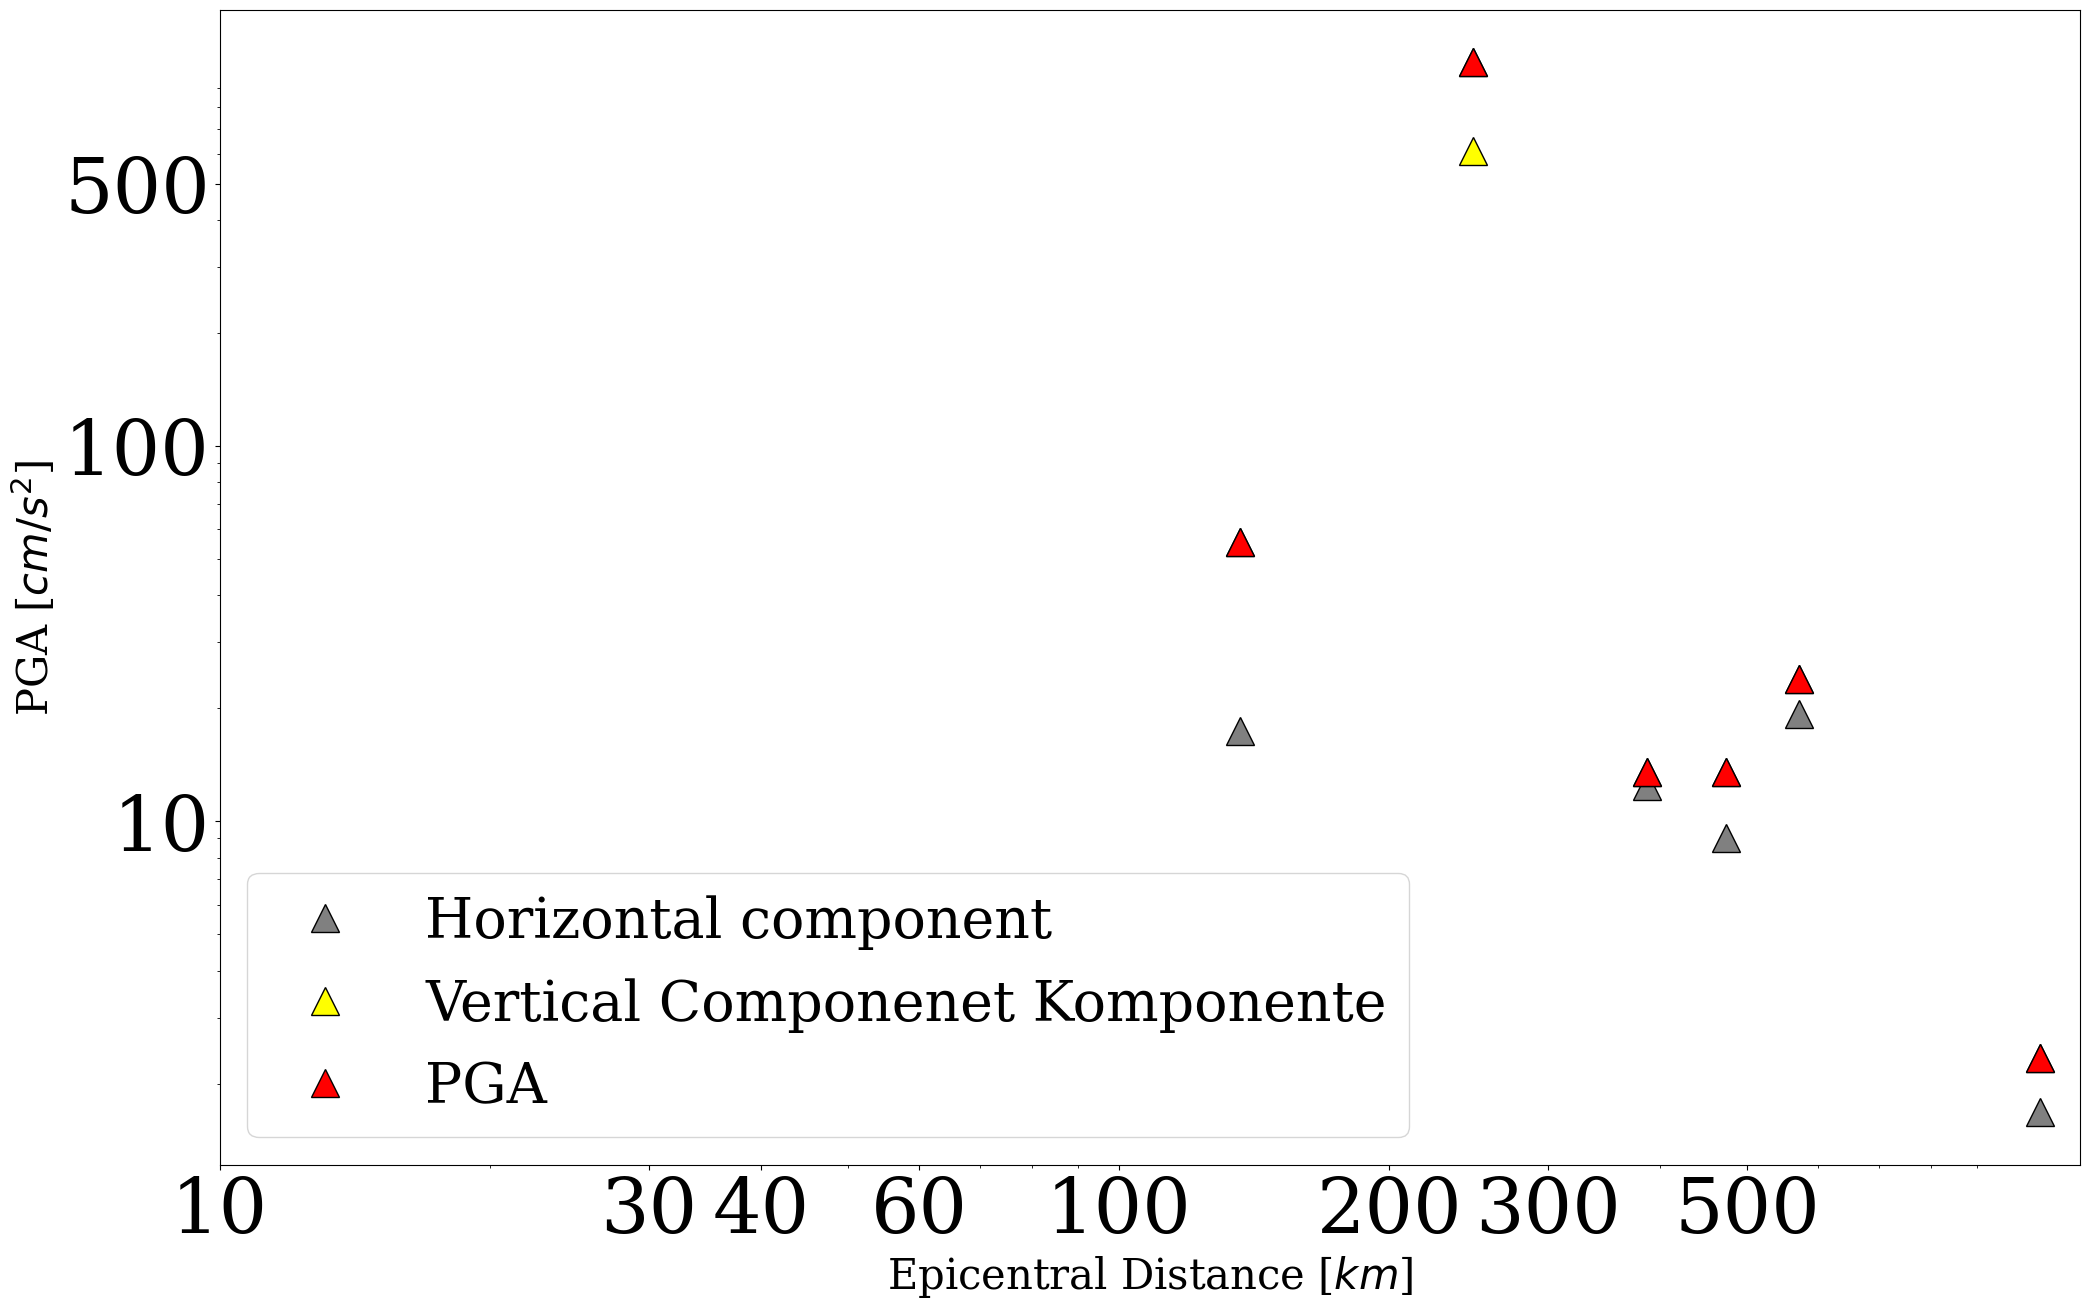

In [12]:
import matplotlib.ticker as ticker


plt.style.use('./bins/instruments_data.mplstyle')


plt.plot(instruments_data['distance'],
                              instruments_data['HNZ'],
                              'k^',mfc='gray',markersize=20, label = 'Horizontal component')

plt.plot(instruments_data['distance'],
                              instruments_data['MaxH'],
                              'k^',mfc='yellow',markersize=20, label = 'Vertical Componenet Komponente')

plt.plot(instruments_data['distance'],
                              instruments_data['pga'],
                              'k^',mfc='r',markersize=20, label = 'PGA')


plt.grid()
plt.legend()

# set axis scale 
plt.xscale('log', base=10)
plt.yscale('log',base=10)

# Customize tick labels to scalar format
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

# Ensure that every tick label is formatted in scalar (no scientific notation)
ax.xaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_scientific(False)


#set label sizes 
plt.xlabel('Epicentral Distance [$km$]', fontsize=30)
plt.ylabel('PGA [$cm/s^2$]', fontsize=30)

#axis bounds 
ticksx = [10,30, 40, 60, 100, 200, 300,500]
ticksy = [10,100,500]

plt.xticks(ticksx)
plt.yticks(ticksy)

#plt.savefig('Bild2_Page2_Var2_SeismicStationRecorda.png', bbox_inches='tight', dpi=300)



## DYFI? 

### Parse DYFI? data from .xml 

In [13]:
file_path_instrument_data = f"./example_data/SHAKEfetch/usgs-instruments_data-versions/us7000pn9s/us7000pn9s_us_015_stationlist.json"
file_path_dyfixml = f'./example_data/SHAKEfetch/usgs-dyfi-versions/us7000pn9s/us7000pn9s_us_1_cdi_geo_1km.txt'


In [16]:
# Parse dyfi Data from Instruments file  
dyfi_parser = USGSParser(parser_type = 'instrumented_data',json_file=file_path_instrument_data)
dyfi_data_stationslist = dyfi_parser.get_dataframe(value_type='mmi')
dyfi_data_stationslist = dyfi_data_stationslist.dropna()
print(dyfi_data_stationslist.columns)

Index(['id', 'station_code', 'instrumentType', 'commType', 'station_name',
       'longitude', 'latitude', 'location', 'source', 'network',
       'station_type', 'nresp', 'vs30', 'intensity', 'intensity_flag',
       'intensity_stddev', 'elev', 'distance', 'rrup', 'repi', 'rhypo', 'rjb',
       'predictions', 'mmi_from_pgm', 'channel_number'],
      dtype='object')


In [17]:
# Parse did you feel it data 
dyfi_parser = USGSParser(parser_type='dyfi_data', file_path=file_path_dyfixml)
dyfi_data = dyfi_parser.get_dataframe()
dyfi_data

Auto-detected file type: 3


,Geocoded box,CDI,No. of responses,Hypocentral distance,Latitude,Longitude,Suspect?,Standard deviation,City,State
0,UTM:(43P 0785 1455 1000),2.2,1,2174,13.1525,77.6335,0,0.33,UTM:(43P 0785 1455 1000),NaN
1,UTM:(43Q 0439 1813 1000),3.8,1,2343,16.4021,74.4334,0,0.33,UTM:(43Q 0439 1813 1000),NaN
2,UTM:(43R 0715 3169 1000),2.0,1,2023,28.6347,77.2045,0,0.33,UTM:(43R 0715 3169 1000),NaN
3,UTM:(44N 0379 0742 1000),1.0,1,2417,6.7161,79.9097,0,0.33,UTM:(44N 0379 0742 1000),NaN
4,UTM:(44Q 0629 1850 1000),3.4,1,1553,16.7338,82.2148,0,0.33,UTM:(44Q 0629 1850 1000),NaN
...,...,...,...,...,...,...,...,...,...,...
1228,UTM:(50T 0449 4431 1000),1.0,1,2796,40.0322,116.4081,0,0.33,UTM:(50T 0449 4431 1000),NaN
1229,UTM:(51P 0289 1638 1000),2.0,1,2770,14.8125,121.0440,0,0.33,UTM:(51P 0289 1638 1000),NaN
1230,UTM:(51R 0238 3355 1000),1.0,1,2603,30.3030,120.2809,0,0.33,UTM:(51R 0238 3355 1000),NaN
1231,UTM:(51R 0339 2763 1000),2.0,1,2624,24.9785,121.4099,0,0.33,UTM:(51R 0339 2763 1000),NaN


### Parse different DYFI? Datasets 

In [18]:
file_path_dyfi = './example_data/SHAKEfetch/usgs-dyfi-versions/us7000pn9s/us7000pn9s_us_1_cdi_geo.txt'
#file_path_dyfi = './example_data/SHAKEfetch-us7000pn9s/usgs-dyfi-versions/us7000pn9s_us_1_cdi_geo_1km.txt'
#file_path_dyfi = './example_data/SHAKEfetch-us7000pn9s/usgs-dyfi-versions/us7000pn9s_us_1_us7000pn9s_plot_numresp.txt'
#file_path_dyfi = './example_data/SHAKEfetch-us7000pn9s/usgs-dyfi-versions/us7000pn9s_us_1_us7000pn9s_plot_numresp.txt'

parser = USGSParser(parser_type='dyfi_data', file_path=file_path_dyfi)

parser.get_dataframe()

Auto-detected file type: 1


,Geocoded box,CDI,No. of responses,Hypocentral distance,Latitude,Longitude,Suspect?,Standard deviation,City,State
0,UTM:(43P 078 145 10000),2.2,1,2175,13.1481,77.6289,0,0.33,Yelahanka,NaN
1,UTM:(43Q 043 181 10000),3.8,1,2347,16.4155,74.3912,0,0.33,Nipani,NaN
2,UTM:(43R 071 316 10000),2.0,1,2022,28.5941,77.1986,0,0.33,Delhi,NaN
3,UTM:(44N 037 074 10000),1.0,1,2418,6.7386,79.8690,0,0.33,Panadura,NaN
4,UTM:(44Q 062 185 10000),3.4,1,1556,16.7747,82.1729,0,0.33,Yanam,NaN
...,...,...,...,...,...,...,...,...,...,...
416,UTM:(50T 044 443 10000),1.0,1,2795,40.0635,116.3551,0,0.33,Peking,NaN
417,UTM:(51P 028 163 10000),2.0,1,2767,14.7805,121.0025,0,0.33,San Jose del Monte,NaN
418,UTM:(51R 023 335 10000),1.0,1,2599,30.2978,120.2447,0,0.33,Hangzhou,NaN
419,UTM:(51R 033 276 10000),2.0,1,2619,24.9915,121.3651,0,0.33,Shulin,NaN


### Create DYFI? .xml data from .csv

In [19]:
file_path_dyficsv = './example_data/us7000m9g4/current/us7000m9g4_dyfi_dat.csv'
event_id = 'us7000m9g4'

creator = USGSParser(parser_type='dyfi_data_xml', mode='create', csv_file=file_path_dyficsv,event_id=event_id)

df = creator.get_dataframe()
creator.write_dyfi_xml()

FileNotFoundError: The CSV file ./example_data/us7000m9g4/current/us7000m9g4_dyfi_dat.csv does not exist.

## Parse Rupture information 

In [20]:
# Example usage
file_path_rupturedata = './example_data/SHAKEfetch/us7000pn9s/current/rupture.json'  # Replace with actual file path


parser = USGSParser(parser_type='rupture_json', mode='parse',rupture_json=file_path_rupturedata)
#parser = USGSParser(data_type='rupture_data',mode='parse',event_id='us6000jllz')

metadata = parser.get_metadata()
coordinates = parser.get_rupture_coordinates()
print("Metadata:", metadata)
print("Coordinates:", coordinates)


Metadata: {'event_id': 'us7000pn9s', 'network': '', 'product_code': 'us7000pn9s', 'event_time': '2025-03-28T00:20:52.000000Z', 'location': '2025 Mandalay, Burma (Myanmar) Earthquake', 'magnitude': 7.7, 'depth': 10.0}
Coordinates: [[[[95.9768, 22.4723, 0.0], [95.9751, 22.1395, 0.0], [95.9854, 21.9769, 0.0], [95.9833, 21.9278, 0.0], [95.9873, 21.8191, 0.0], [95.9902, 21.5628, 0.0], [96.0015, 21.436, 0.0], [96.0217, 20.0861, 0.0], [96.0473, 20.7553, 0.0], [96.0966, 20.2881, 0.0], [96.1515, 19.902, 0.0], [96.1532, 19.8479, 0.0], [96.162, 19.7965, 0.0], [96.1823, 19.6538, 0.0], [96.2028, 19.5365, 0.0], [96.3018, 18.9324, 0.0], [96.3456, 18.695, 0.0], [96.427, 18.2604, 0.0], [96.427, 18.2604, 15.0], [96.3456, 18.695, 15.0], [96.3018, 18.9324, 15.0], [96.2028, 19.5365, 15.0], [96.1823, 19.6538, 15.0], [96.162, 19.7965, 15.0], [96.1532, 19.8479, 15.0], [96.1515, 19.902, 15.0], [96.0966, 20.2881, 15.0], [96.0473, 20.7553, 15.0], [96.0217, 20.0861, 15.0], [96.0015, 21.436, 15.0], [95.9902, 21.56

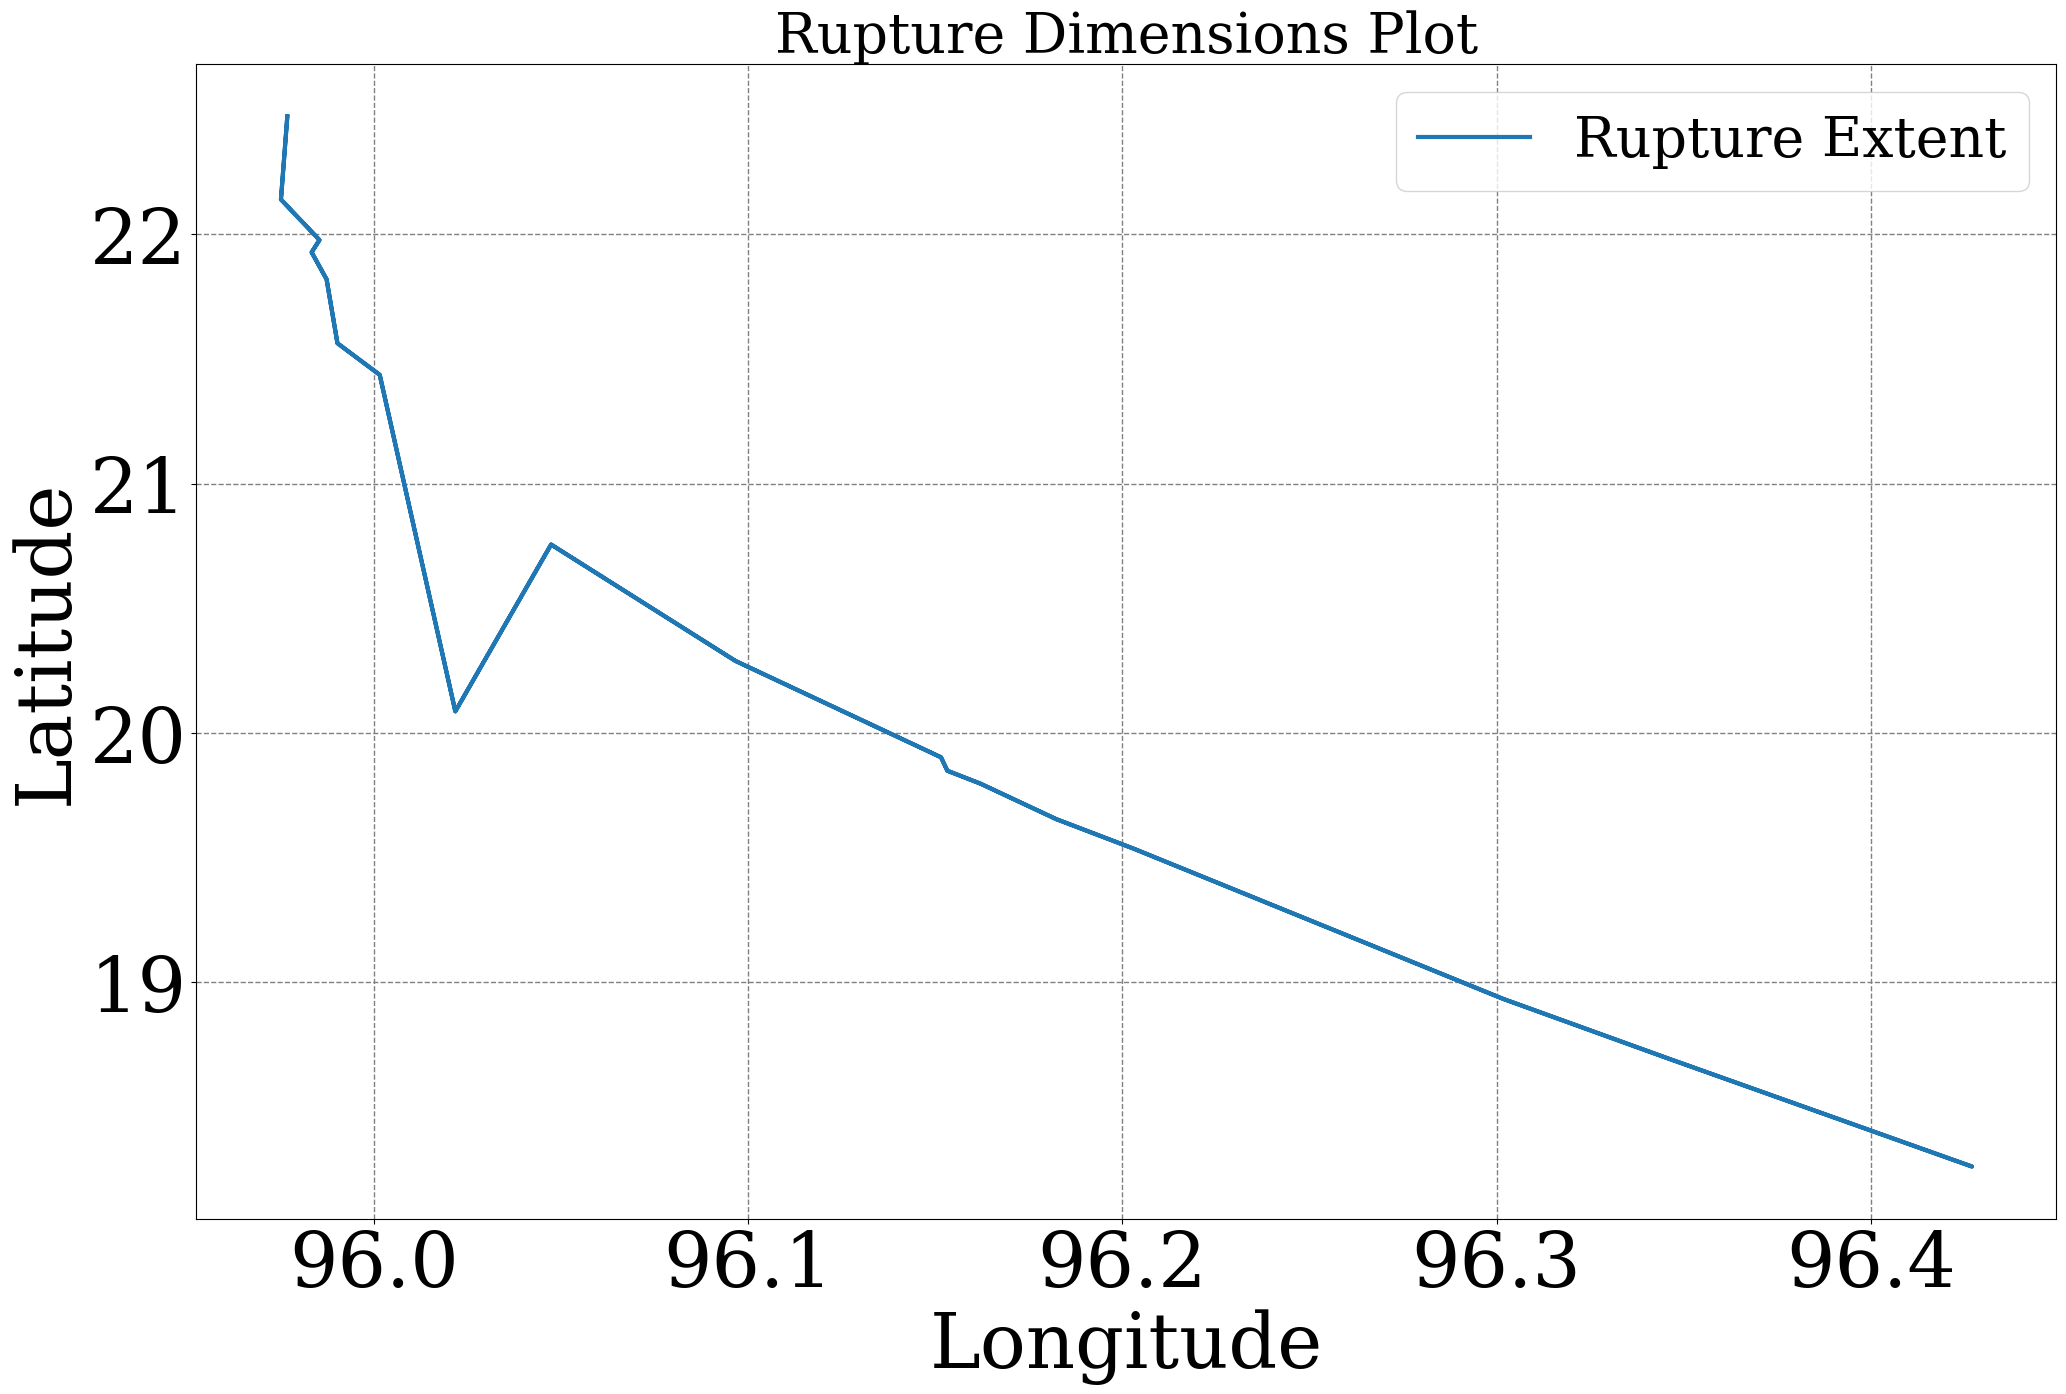

In [21]:
# Extract rupture coordinates
x_coords, y_coords = parser.get_rupture_xy()

# Plotting function
fig, ax = plt.subplots()
ax.plot(x_coords, y_coords, '-', label='Rupture Extent')
ax.set_title('Rupture Dimensions Plot')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()
plt.show()

## Parse Shakemap Data 

### Shakemap from .FLT files

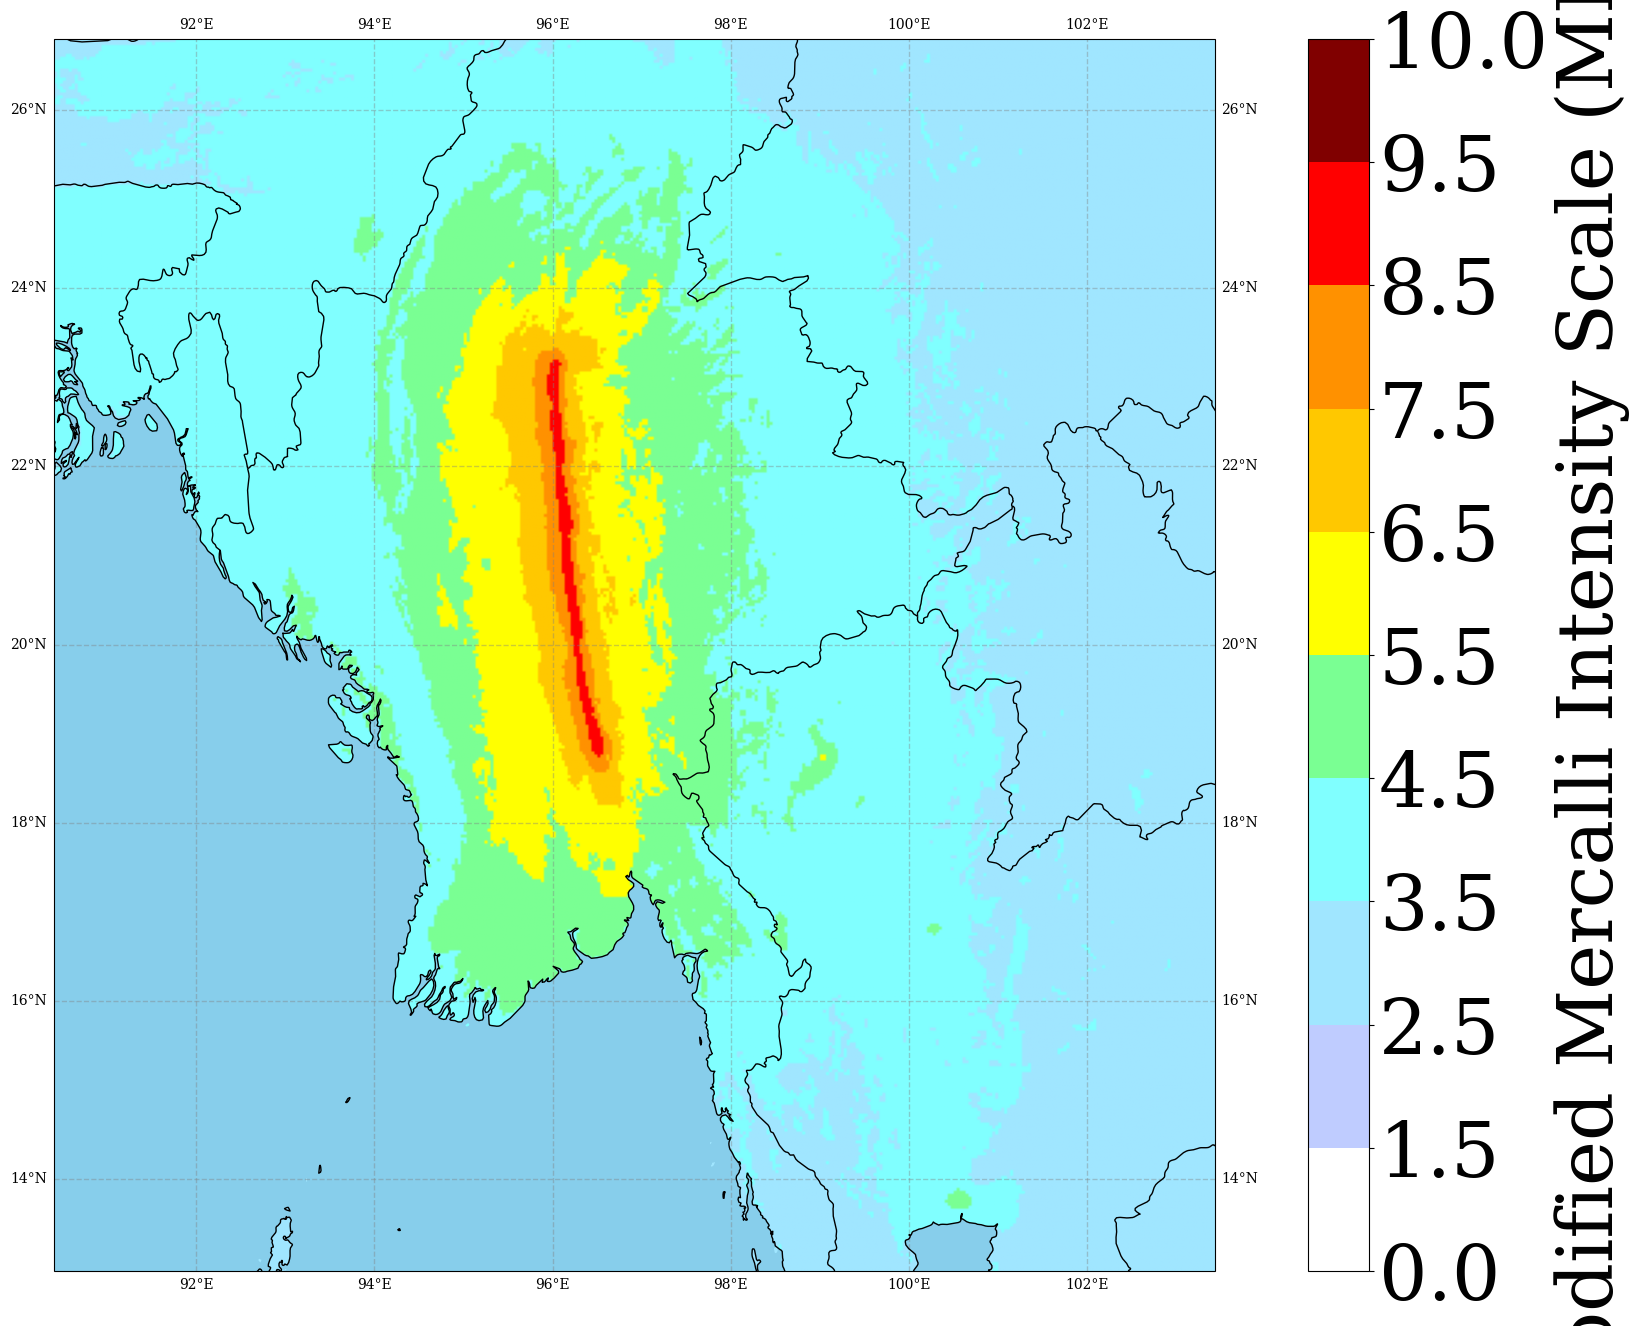

In [22]:
raster_shakemap_file_path = "./example_data/SHAKEfetch/usgs-shakemap-versions/us7000pn9s/us7000pn9s_us_011_raster.zip"


shakemap_parser_zip = USGSParser(parser_type="shakemap_raster",zip_file=raster_shakemap_file_path, map_type="mmi", data_type="mean")

           
shakemap_parser_zip.plot_shakemap()
shakemap_parser_zip.cleanup()

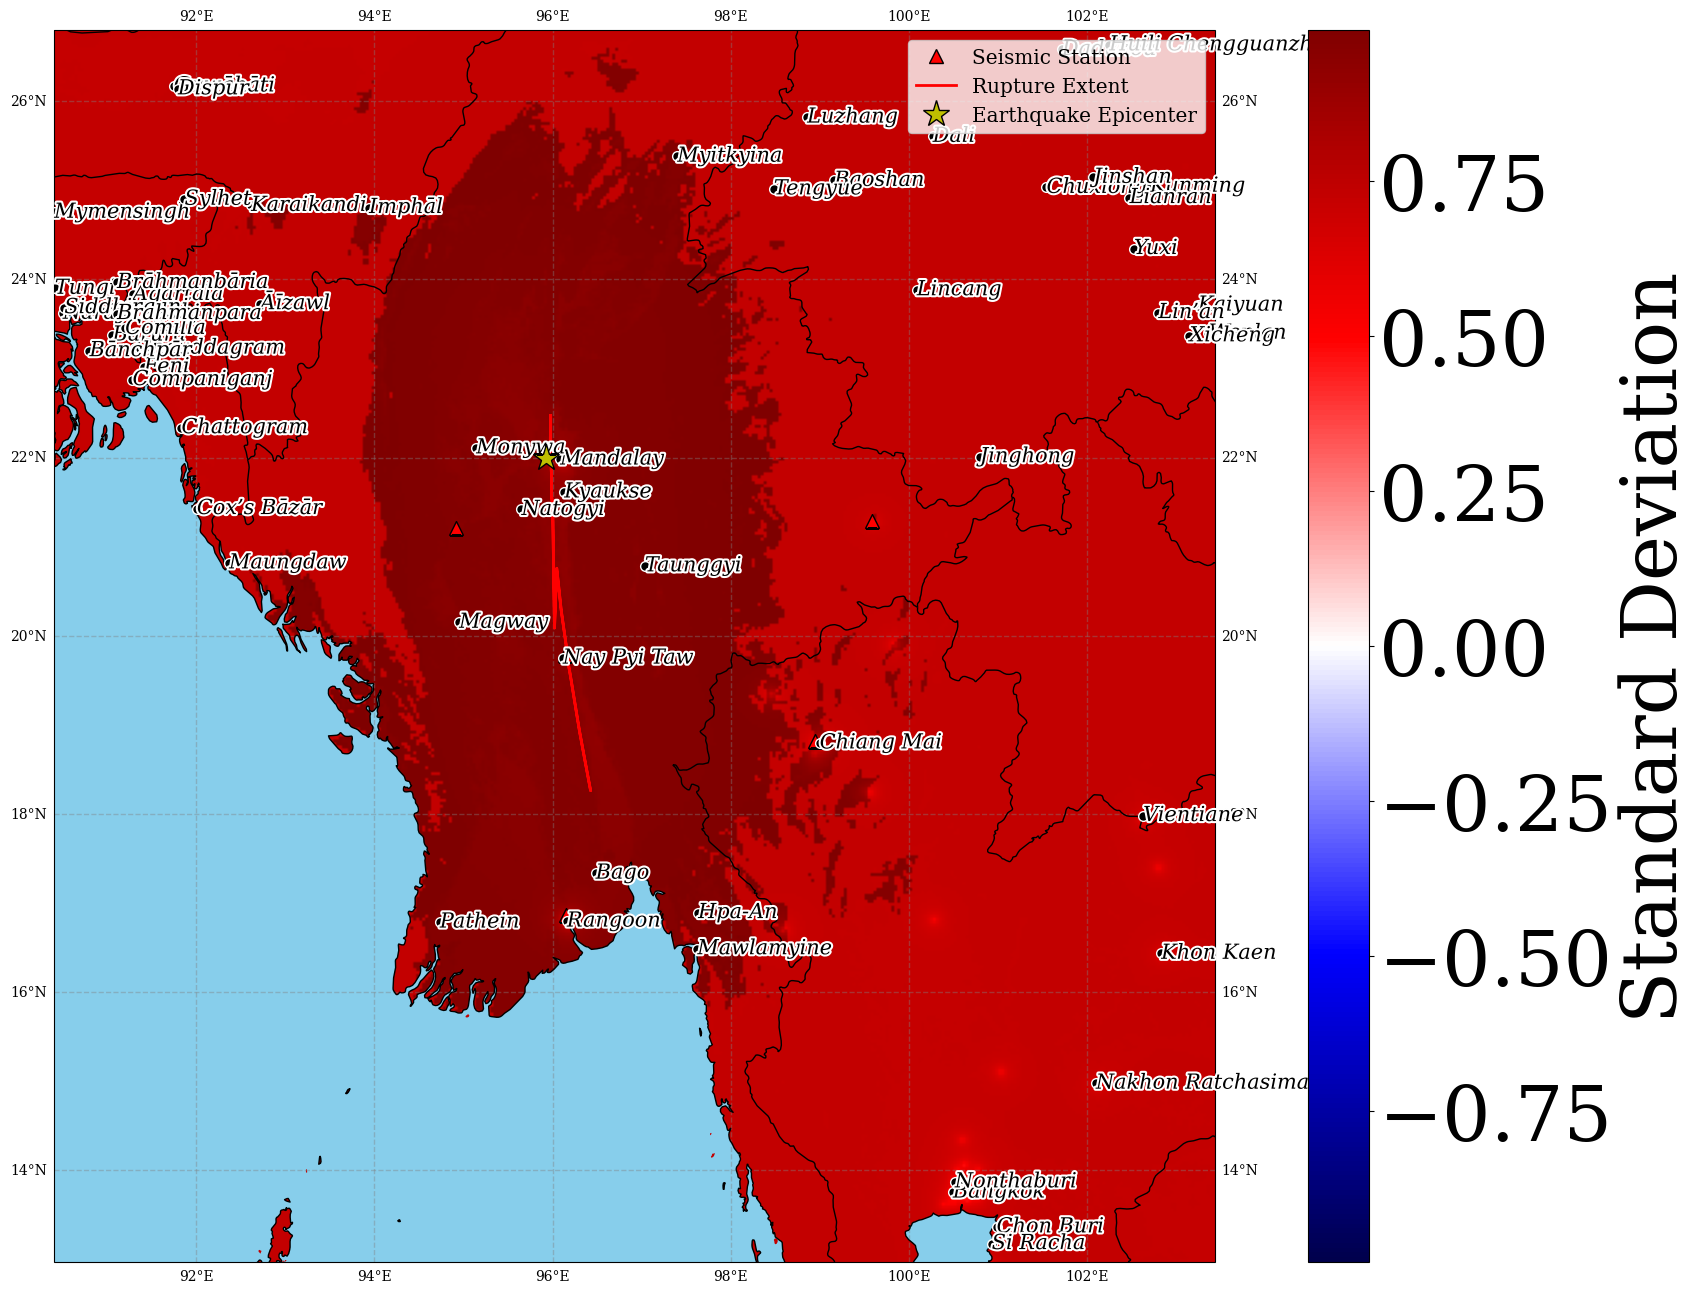

In [23]:
# Example usage for accessing files inside a ZIP archive and adding more features 
shakemap_parser_zip = USGSParser(parser_type="shakemap_raster",zip_file=raster_shakemap_file_path, map_type="mmi", data_type="std")


fig,ax = shakemap_parser_zip.plot_shakemap()


shakemap_parser_zip.add_stations(fig,ax,instruments_data['longitude'],instruments_data['latitude'] )

shakemap_parser_zip.add_cities(fig, ax,200000)



x_coords, y_coords = parser.get_rupture_xy()
shakemap_parser_zip.add_rupture(fig,ax,x_coords,y_coords )

x_coords, y_coords = event_df['lon'],event_df['lat']
shakemap_parser_zip.add_epicenter(fig,ax,x_coords,y_coords)


ax.legend(loc='upper right', fontsize='x-large')




shakemap_parser_zip.cleanup()



In [24]:
cities = shakemap_parser_zip.get_cities()
cities

,city_name,city_ascii,Latitude,Longitude,country,iso2,iso3,admin_name,capital,population,id
15,Bangkok,Bangkok,13.7525,100.4942,Thailand,TH,THA,Krung Thep Maha Nakhon,primary,18007000.0,1764068610
73,Chattogram,Chattogram,22.3350,91.8325,Bangladesh,BD,BGD,Chattogram,admin,7000000.0,1050830722
121,Rangoon,Rangoon,16.7950,96.1600,Burma,MM,MMR,Yangon,primary,5209541.0,1104616656
153,Kunming,Kunming,25.0464,102.7094,China,CN,CHN,Yunnan,admin,4422686.0,1156477539
336,Baoshan,Baoshan,25.1120,99.1610,China,CN,CHN,Yunnan,NaN,2431211.0,1156546994
...,...,...,...,...,...,...,...,...,...,...,...
46498,Luân Châu,Luan Chau,21.7400,103.3430,Vietnam,VN,VNM,Điện Biên,NaN,7335.0,1704201464
46576,Mae Hong Son,Mae Hong Son,19.3011,97.9700,Thailand,TH,THA,Mae Hong Son,admin,6526.0,1764090874
46728,Jinzhong,Jinzhong,26.3504,103.4167,China,CN,CHN,Yunnan,minor,5170.0,1156252749
47657,Anouvông,Anouvong,18.8989,103.0919,Laos,LA,LAO,Xaisômboun,admin,NaN,1418294155


### Shakemap from .xml datafile 

In [25]:
# Example usage

xml_shakemap_file_path = "./example_data/SHAKEfetch/usgs-shakemap-versions/us7000pn9s/us7000pn9s_us_011_grid.xml"

parser =  USGSParser(parser_type="shakemap_xml",xml_file=xml_shakemap_file_path, imt='MMI')
df = parser.get_dataframe()
data_dict = parser.get_dict()

print(df)


             LON LON_units   LAT LAT_units   SVEL SVEL_units  MMI  MMI_units
0        90.4000        dd  26.8        dd  302.0        m/s  3.3  intensity
1        90.4333        dd  26.8        dd  302.9        m/s  3.3  intensity
2        90.4667        dd  26.8        dd  294.5        m/s  3.4  intensity
3        90.5000        dd  26.8        dd  278.2        m/s  3.4  intensity
4        90.5333        dd  26.8        dd  316.8        m/s  3.3  intensity
...          ...       ...   ...       ...    ...        ...  ...        ...
162260  103.2667        dd  13.0        dd  225.4        m/s  3.0  intensity
162261  103.3000        dd  13.0        dd  221.4        m/s  3.0  intensity
162262  103.3333        dd  13.0        dd  210.2        m/s  3.0  intensity
162263  103.3667        dd  13.0        dd  211.8        m/s  3.0  intensity
162264  103.4000        dd  13.0        dd  210.0        m/s  3.0  intensity

[162265 rows x 8 columns]


## Parse Pager data

In [26]:
# Example usage:
file_path_pagerxml = './example_data/SHAKEfetch/usgs-pager-versions/us7000pn9s/us7000pn9s_us_010_pager.xml'  # Change to the actual path of your XML file

pager_parser = USGSParser(parser_type='pager_xml',mode='parse', xml_file=file_path_pagerxml)
event_details = pager_parser.get_pager_details()
alerts = pager_parser.get_alerts()
cities_impact = pager_parser.get_cities_impact()
comments = pager_parser.get_structural_comments()

#print(event_details)
print(alerts)
#print(cities_impact)
#print(comments)


[{'type': 'economic', 'level': 'red', 'summary': 'yes', 'bins': [{'min': '0', 'max': '1', 'probability': '0.00', 'color': 'green'}, {'min': '1', 'max': '10', 'probability': '0.00', 'color': 'yellow'}, {'min': '10', 'max': '100', 'probability': '0.01', 'color': 'yellow'}, {'min': '100', 'max': '1000', 'probability': '0.07', 'color': 'orange'}, {'min': '1000', 'max': '10000', 'probability': '0.24', 'color': 'red'}, {'min': '10000', 'max': '100000', 'probability': '0.35', 'color': 'red'}, {'min': '100000', 'max': '10000000', 'probability': '0.33', 'color': 'red'}]}, {'type': 'fatality', 'level': 'red', 'summary': 'no', 'bins': [{'min': '0', 'max': '1', 'probability': '0.00', 'color': 'green'}, {'min': '1', 'max': '10', 'probability': '0.00', 'color': 'yellow'}, {'min': '10', 'max': '100', 'probability': '0.01', 'color': 'yellow'}, {'min': '100', 'max': '1000', 'probability': '0.06', 'color': 'orange'}, {'min': '1000', 'max': '10000', 'probability': '0.22', 'color': 'red'}, {'min': '10000'

In [27]:
# converting pager data to dataframes 
# Example usage:
#pager_parser = ParsePagerDataXML(xml_path)
dataframes = pager_parser.get_dataframe()

#print(dataframes['Event Details'])
#print(dataframes['Alerts'])
print(dataframes['Cities Impact'])
#print(dataframes['Comments'])

                     name      lat       lon population  mmi iscapital
0                Mandalay  21.9747   96.0836    1208099  8.9         1
1                 Kyaukse  21.6056   96.1351      50480  8.8         0
2                 Taungoo  18.9429   96.4341     106945  8.8         0
3                Yamethin  20.4319   96.1388      59867  8.3         0
4                 Sagaing  21.8787   95.9797      78739  8.3         1
...                   ...      ...       ...        ...  ...       ...
1038    Thi Tran Tua Chua  21.8577  103.3426          0  2.9         0
1039       Dien Bien Dong  21.2967  103.2201          0  3.0         0
1040  Thi Tran GJien Bien  21.2596  103.0344          0  3.0         0
1041    Thi Tran Muong Te  22.3807  102.8201          0  2.9         0
1042            Muong Ang  21.5199  103.2229          0  2.9         0

[1043 rows x 6 columns]
